In [124]:
import numpy as np
from matplotlib import pyplot

Grid = None # Maze Grid storage

DISTANCE = 16 # length of the square, go for 8-20

# Creates a grid of x squares by y squares with separators (output is x*DISTANCE + 2 by y*DISTANCE + 2)
# Also used to reset the grid to an initial point
def makeGrid(x : int = 5, y : int = 5):
    if type(x) != type(0):
        raise BaseException('Grid.makeGrid - The input "x" must be an int.')
    if type(y) != type(0):
        raise BaseException('Grid.makeGrid - The input "y" must be an int.')
    grid = []
    for i in range(x * DISTANCE + 2):
        sample = []
        for j in range(y * DISTANCE + 2):
            if i % DISTANCE == 0 or i % DISTANCE == 1 or j % DISTANCE == 0 or j % DISTANCE == 1:
                sample.append((0,0,0)) # black border/grid
            else:
                sample.append((225,225,225)) # white rest as default
        grid.append(sample)
    global Grid
    Grid = np.array(grid, dtype = 'uint8')

def getGrid():
    return Grid
def setGrid(grid):
    global Grid
    Grid = grid

# Could move the below code to another script

# Displays the grid using the specified approach, Graph or Text
def displayGrid(variant = 'Graph'):
    return variant == 'Graph' and graph() or variant == 'Text' and text() or None

# Displays the grid as an image
def graph():
    fig = pyplot.figure()
    ax = pyplot.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(Grid)
    pass

# for later, just using it to test image quality for now
def save():
    pyplot.imsave('sample.png', Grid)

def text():
    # ...
    pass

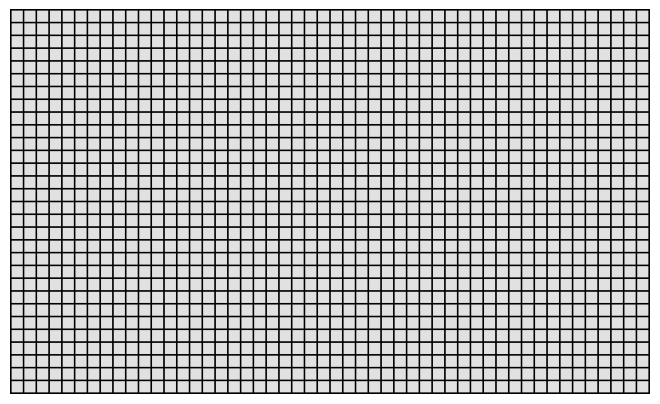

In [125]:
# Test, using ipynb to make it easier to see the results in Github without having to run it yourself.  Will probably change to .py later.
makeGrid(x = 30, y = 50)
displayGrid()